## King's County Housing Project
### Data Science Phase Two
#### Deanna Gould
* Flex Student
* Instructor name: Morgan Jones
* Blog post URL:


## Purpose of this Notebook

In this project, my stakeholder will be a real estate investment firm, and will also make recommendations that can be used for people who are looking to renovate their home or invest in their home to create a greater sale price for their home. To do that, this notebook will: 

* Find the most highly correlated features to price
* Find any independent features that are too highly correlated to each other (multicollinearity)
* Create a reproducable regression model that best predicts housing prices

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Creating the DataFrame for the KC Housing Data

df = pd.read_csv('data/kc_house_data.csv', index_col=0)

In [3]:
# Looking at what the first few rows and columns of the housing data looks like

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# Checking the size of the DataFrame

df.shape

(30155, 24)

In [5]:
# Checking the datatypes in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [6]:
# Checking which columns may contain null values

df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source       True
sewer_system      True
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

The heat_source and sewer_system columns have some null values, and I'm not sure how necessary that will be in my analysis, but regardless of that, I'm going to check how many null values are in the column before I remove rows with null values.

In [7]:
# Getting a sum of the null values in each column

df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
# Creating a copy of the DataFrame so I can compare to the original df I imported without restarting the notebook

kc = df.copy()

In [9]:
# Finding the datatypes of the columns and starting to think about numerical vs categorical columns

kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

### Some Data Exploration

**Checking Distribution of Dataframe**

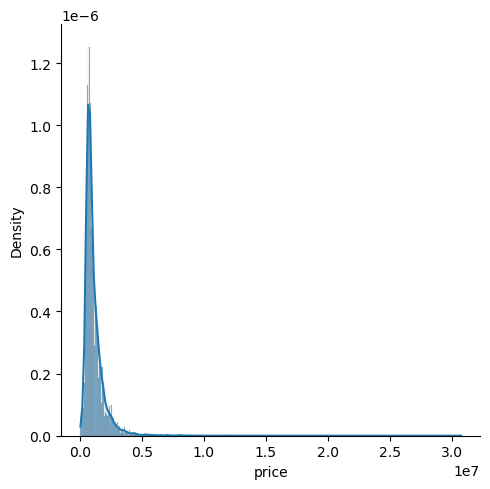

In [10]:
# Creating a distributionn plot to check if there is a skew

sns.displot(kc['price'], stat="density", kde=True)

It's clear that the distribution plot for price has a heavy right skew, so I'm going to use the 1.5 IQR rule to remove outliers, which means I'll remove the bottom quarter and the top quarter of the dataset.

In [11]:
# Creating variables for q1 and q3 and creating a variable for IQR

q1 = kc['price'].quantile(0.25)
q3 = kc['price'].quantile(0.75)
IQR = q3-q1
print(IQR)

652000.0


In [12]:
# Creating variables for upper bound and lower bound, which will be the parameters for what I end up excluding

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print(upper_bound)

print(lower_bound)

2278000.0
-330000.0


In [13]:
# Removing upper bound and lower bound from price in kc DataFrame

kc['price'] = kc.loc[kc['price'] < upper_bound, 'price']
kc['price'] = kc.loc[kc['price'] > lower_bound, 'price']

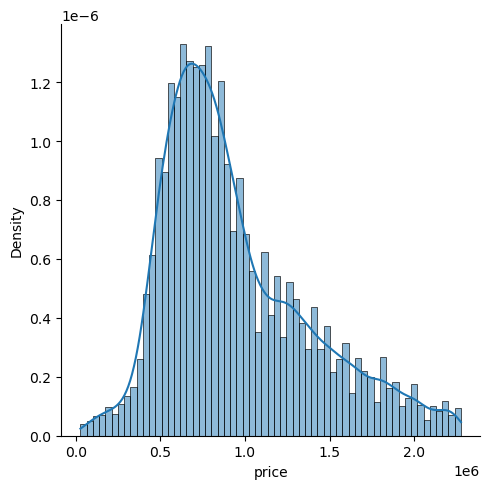

In [14]:
# Plotting the new distribution plot after removing outliers

sns.displot(kc['price'], stat="density", kde=True)

As seen above, there is still a right skew, but it does look like a normal distribution.

In [15]:
# Finding the shape of the dataframe to see how many rows and columns there are

kc.shape

(30155, 24)

In [16]:
# Checking again how many null values there are in each column of the kc DataFrame

kc.isna().sum()

date                0
price            1994
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
greenbelt           0
nuisance            0
view                0
condition           0
grade               0
heat_source        32
sewer_system       14
sqft_above          0
sqft_basement       0
sqft_garage         0
sqft_patio          0
yr_built            0
yr_renovated        0
address             0
lat                 0
long                0
dtype: int64

In [17]:
# Dropping null values

kc.dropna(inplace=True)

In [18]:
# Double checking that the null values were dropped

kc.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source      False
sewer_system     False
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

Great! All of the null values have been dropped. Now I'm going to create a DataFrame for the numeric independent variables.

In [20]:
# Creating a DataFrame for independent variables based on correlation and their absolute values

X_corr = kc.corr().abs()
X_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
price,1.000000,0.316282,0.433880,0.564844,0.077405,0.195117,0.479194,0.205531,0.238316,0.245878,0.075614,0.055710,0.086350,0.030871
bedrooms,0.316282,1.000000,0.557618,0.645403,0.002335,0.116793,0.529318,0.215977,0.295623,0.137793,0.126421,0.000561,0.107142,0.109424
bathrooms,0.433880,0.557618,1.000000,0.722441,0.022277,0.396196,0.601982,0.206635,0.421672,0.264457,0.458517,0.020221,0.024517,0.029681
sqft_living,0.564844,0.645403,0.722441,1.000000,0.115618,0.284965,0.855908,0.276017,0.480235,0.331537,0.294767,0.014095,0.101865,0.095888
sqft_lot,0.077405,0.002335,0.022277,0.115618,1.000000,0.041789,0.124770,0.002696,0.079095,0.158456,0.005241,0.014152,0.031068,0.036764
floors,0.195117,0.116793,0.396196,0.284965,0.041789,1.000000,0.447709,0.285742,0.110660,0.110476,0.558364,0.032536,0.232737,0.244973
sqft_above,0.479194,0.529318,0.601982,0.855908,0.124770,0.447709,1.000000,0.174731,0.531599,0.247263,0.398431,0.007520,0.088414,0.088857
sqft_basement,0.205531,0.215977,0.206635,0.276017,0.002696,0.285742,0.174731,1.000000,0.017457,0.160636,0.261110,0.037035,0.058618,0.043849
sqft_garage,0.238316,0.295623,0.421672,0.480235,0.079095,0.110660,0.531599,0.017457,1.000000,0.172350,0.439144,0.108990,0.088129,0.097109
sqft_patio,0.245878,0.137793,0.264457,0.331537,0.158456,0.110476,0.247263,0.160636,0.172350,1.000000,0.123701,0.044037,0.033257,0.035653


In [21]:
# Returning True or Fals if there's a correlation above 0.5

X_corr > 0.5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,True,True,False,False,True,False,False,False,False,False,False,False
bathrooms,False,True,True,True,False,False,True,False,False,False,False,False,False,False
sqft_living,True,True,True,True,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,True,False,False,False
sqft_above,False,True,True,True,False,False,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_garage,False,False,False,False,False,False,True,False,True,False,False,False,False,False
sqft_patio,False,False,False,False,False,False,False,False,False,True,False,False,False,False


I'll ignore latitude and longitude for now, but now I can easily tell which columns have a correlation greater than 0.5. However, I'm still going to look at this information in a Heatmap because it may be easier to look at than what was returned above.

<AxesSubplot:>

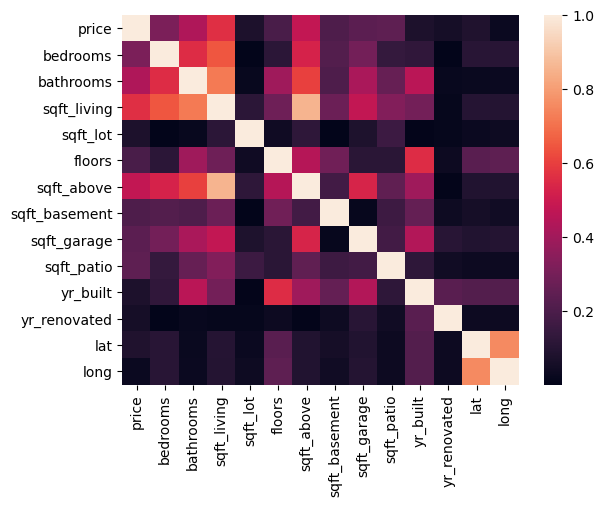

In [22]:
# Creating a heatmap for the DataFrame above

sns.heatmap(X_corr)

In the heatmap above, I can see which columns might be collinear and which have greater correlations to each other. Columns that are white will be collinear, but other columns that are highly correlated to price would be sqft_living, sqft_above, bathrooms, and bedrooms.

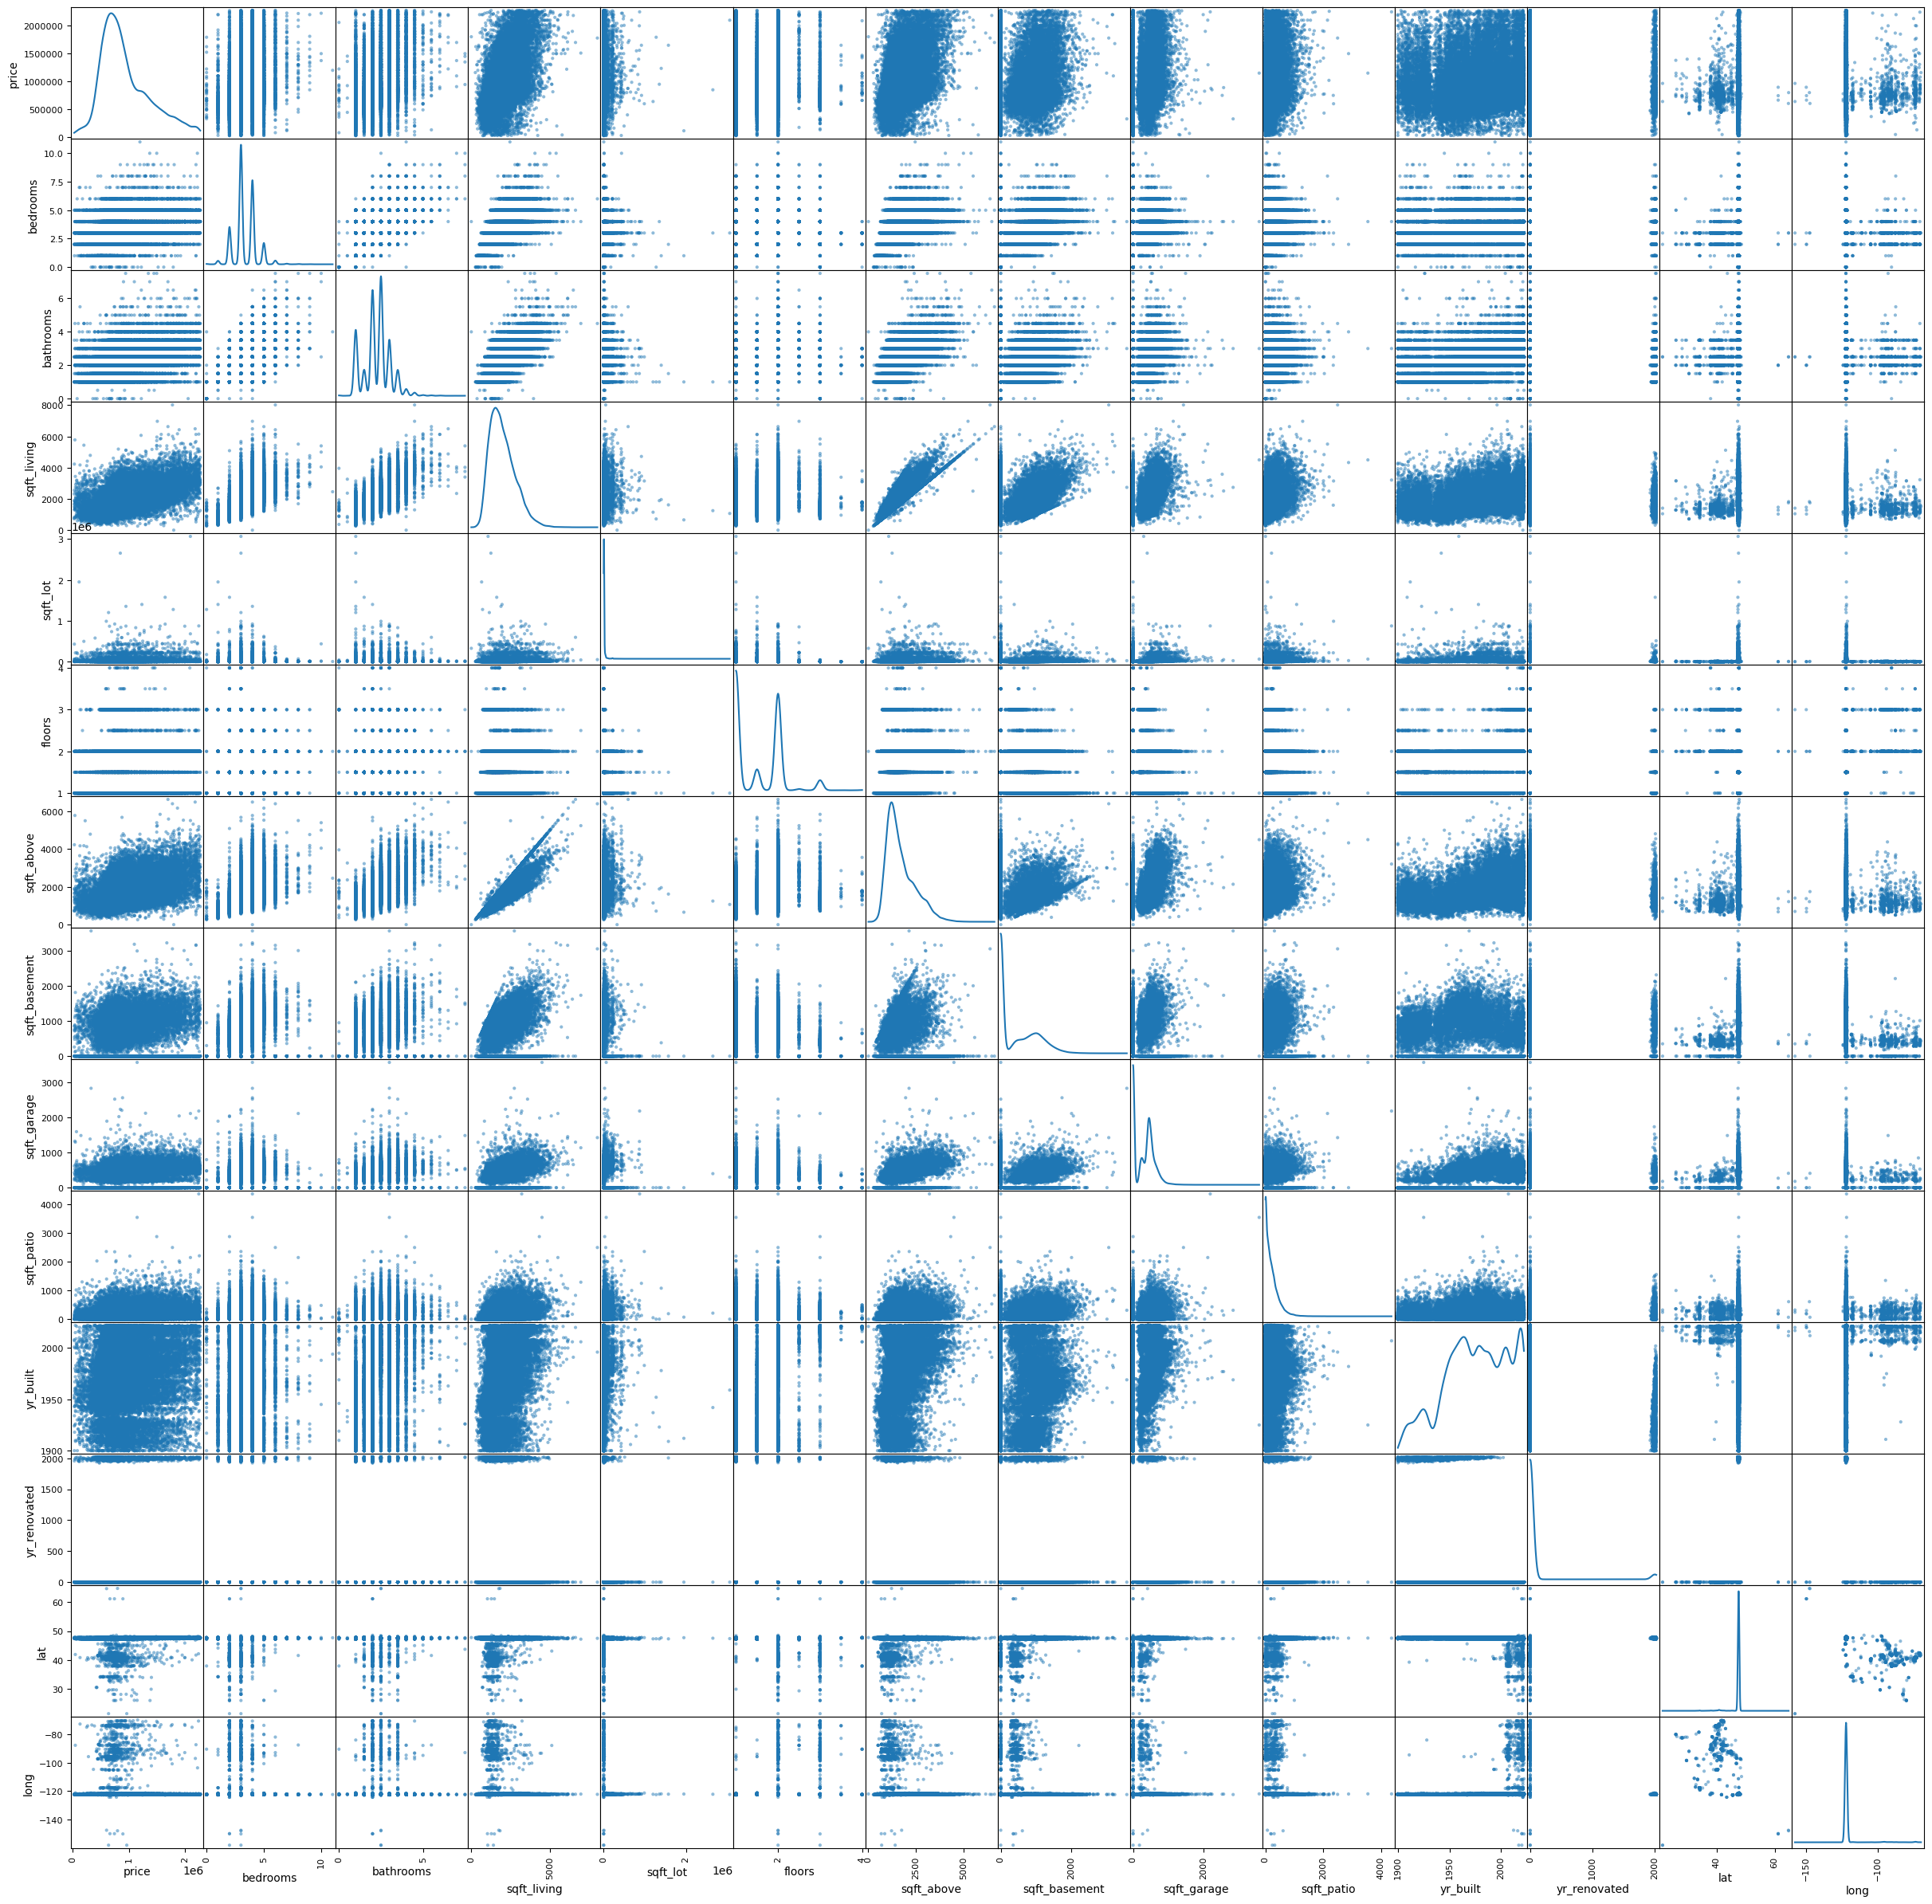

In [23]:
# Creating a scatter matrix to show the distributions of data in the DataFrame

matr = pd.plotting.scatter_matrix(kc, figsize=[30,30], diagonal='kde')

In [24]:
# Creating a different view to see the most highly correlated columns to price

kc.corr()["price"]

price            1.000000
bedrooms         0.316282
bathrooms        0.433880
sqft_living      0.564844
sqft_lot         0.077405
floors           0.195117
sqft_above       0.479194
sqft_basement    0.205531
sqft_garage      0.238316
sqft_patio       0.245878
yr_built         0.075614
yr_renovated     0.055710
lat              0.086350
long            -0.030871
Name: price, dtype: float64

Now that I know the correlations to price of numerical features, below I'll be doing some data exploration, finding columns that will be useful for the model, and dropping columns that won't be.

In [25]:
# Running kc.head() to remind myself of the columns and their values

kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [26]:
# Creating a new variable which copies the predictors from the kc dataframe

data_pred = kc.iloc[:, 3:25]

In [27]:
# Looking at the dataframe to see what columns are in it and if I got all of the columns I needed

data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28121 entries, 7399300360 to 9557800100
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      28121 non-null  float64
 1   sqft_living    28121 non-null  int64  
 2   sqft_lot       28121 non-null  int64  
 3   floors         28121 non-null  float64
 4   waterfront     28121 non-null  object 
 5   greenbelt      28121 non-null  object 
 6   nuisance       28121 non-null  object 
 7   view           28121 non-null  object 
 8   condition      28121 non-null  object 
 9   grade          28121 non-null  object 
 10  heat_source    28121 non-null  object 
 11  sewer_system   28121 non-null  object 
 12  sqft_above     28121 non-null  int64  
 13  sqft_basement  28121 non-null  int64  
 14  sqft_garage    28121 non-null  int64  
 15  sqft_patio     28121 non-null  int64  
 16  yr_built       28121 non-null  int64  
 17  yr_renovated   28121 non-null  int64

**Checking for Multicollinearity**

In [28]:
# Utilzing .stack to get returned a list that will return multicollinear relationships

df2=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to new pairs column
df2.set_index(['pairs'], inplace = True)

#drop level columns that were created originally by default
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column
df2.columns = ['cc']

# drop duplicates in case any were created in this process
df2.drop_duplicates(inplace=True)

In [29]:
# Running below code to return the pairs that have a greater correlation than .50 and less than 1

df2[(df2.cc>.50) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.855908
"(long, lat)",0.756660
"(sqft_living, bathrooms)",0.722441
"(bathrooms, sqft_above)",0.601982
"(floors, yr_built)",0.558364
"(sqft_garage, sqft_above)",0.531599


It seems like the highest correlation between two columns is with `sqft_living` and `sqft_above`. I'm going to avoid using `sqft_above` because a house with a certain square footage will have most of it in sqft_above. 

In [30]:
# Dropping sqft_above from the DataFrame

kc.drop(columns = ['sqft_above'], axis=1, inplace=True)

In [31]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,Gas,PUBLIC,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Oil,PUBLIC,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Gas,PUBLIC,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Gas,PUBLIC,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,Electricity,PUBLIC,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


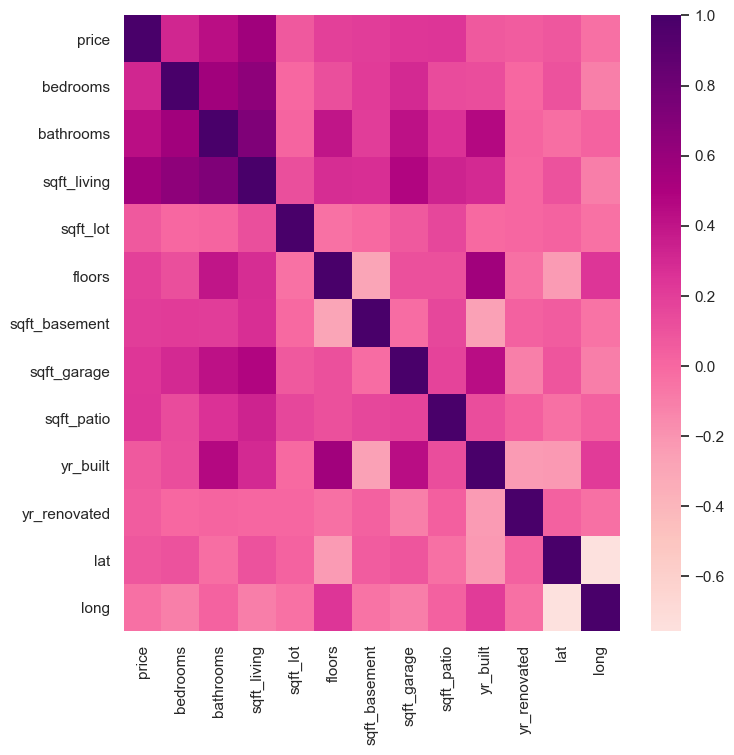

In [32]:
# Creating a new heatmap to see the correlations without sqft_above

sns.set(rc = {'figure.figsize':(8, 8)})
sns.heatmap(kc.corr(), center=0, cmap='RdPu');

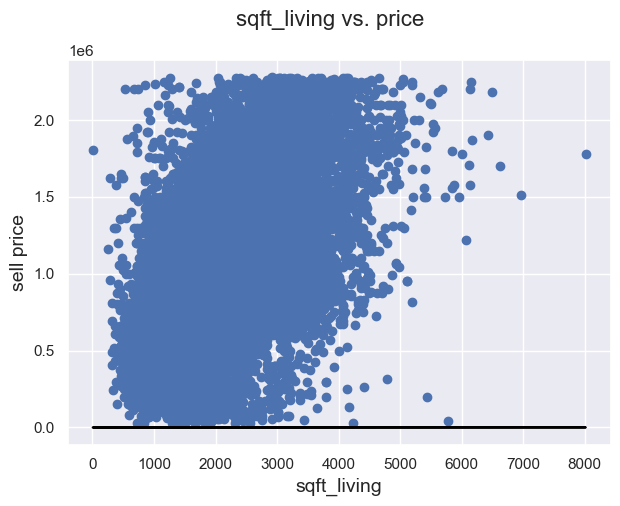

In [33]:
# Creating a scatter plot to show price vs sqft_livinh

# plot data and y = 0.1x regression line

fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('sqft_living vs. price', fontsize=16)
ax.scatter(kc['sqft_living'], kc['price'])
ax.plot(kc['sqft_living'], kc['sqft_living']/15, c='black')
ax.set_xlabel('sqft_living', fontsize=14)
ax.set_ylabel('sell price', fontsize=14);

In [34]:
# Returning the columns which have an object dtype to remind myself what ones I need to analyze

print(kc.select_dtypes("object").columns)

Index(['date', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'address'],
      dtype='object')


In [35]:
kc['waterfront'].value_counts()

NO     27797
YES      324
Name: waterfront, dtype: int64

With only 1.75% of homes being Waterfront, I won't use this in my regression model because it won't describe the change in price for a large majority of homes, only a select few.

<AxesSubplot:xlabel='waterfront'>

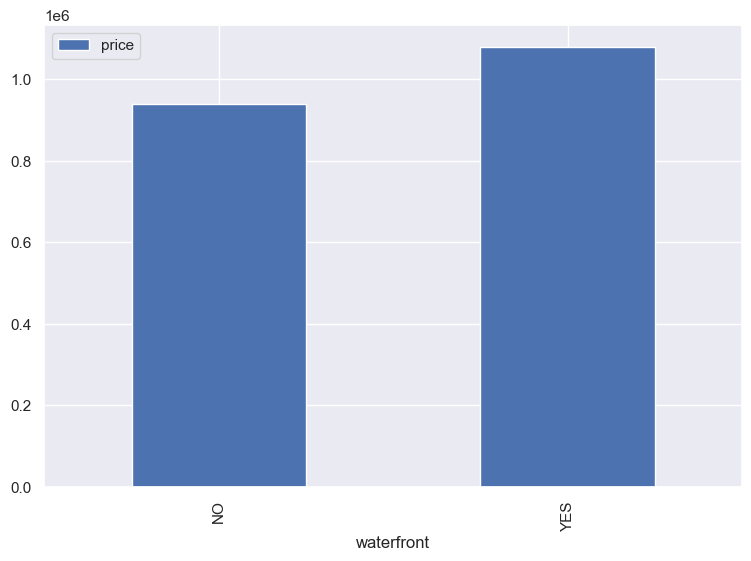

In [36]:
kc.groupby('waterfront').mean().plot.bar(y="price", figsize=(9,6))

Based on the graph above, it doesn't seem like a home being waterfront impacts the price as much as I would have expected, and there aren't many homes that are waterfront to begin with, so I'm not going to use that in my regression model.

In [37]:
# Doing a similar process as above for heat_source

kc['heat_source'].value_counts()

Gas                  18889
Electricity           6255
Oil                   2822
Gas/Solar               76
Electricity/Solar       57
Other                   18
Oil/Solar                4
Name: heat_source, dtype: int64

Most homes use gas as a heating source, followed by electricity and then oil, so that might not be a good predictor either.

<AxesSubplot:xlabel='heat_source'>

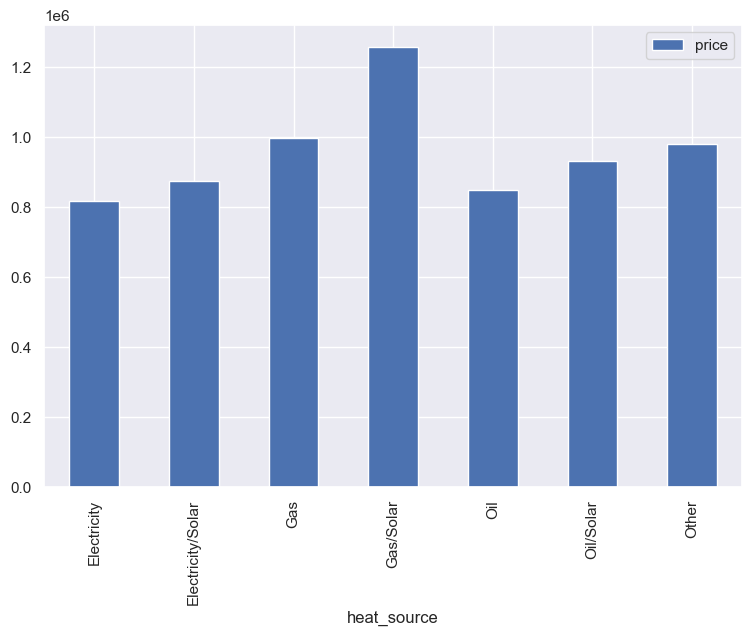

In [38]:
# Trying to find which heat sources have the biggest impact on price

kc.groupby('heat_source').mean().plot.bar(y="price", figsize=(9,6))

It looks like homes that have gas/solar as a heating source have the highest sell price, but taking into account that there are only 93 homes that are gas/solar, it might not be the best feature to include. However, it could be a good sign that if you were to install solar, the home could be worth more than others.

In [39]:
kc['condition'].value_counts()

Average      17135
Good          7654
Very Good     3054
Fair           218
Poor            60
Name: condition, dtype: int64

Above, `condition` might be a good indicator with price, but we will have to do more exploring to fnd out.

<AxesSubplot:xlabel='condition'>

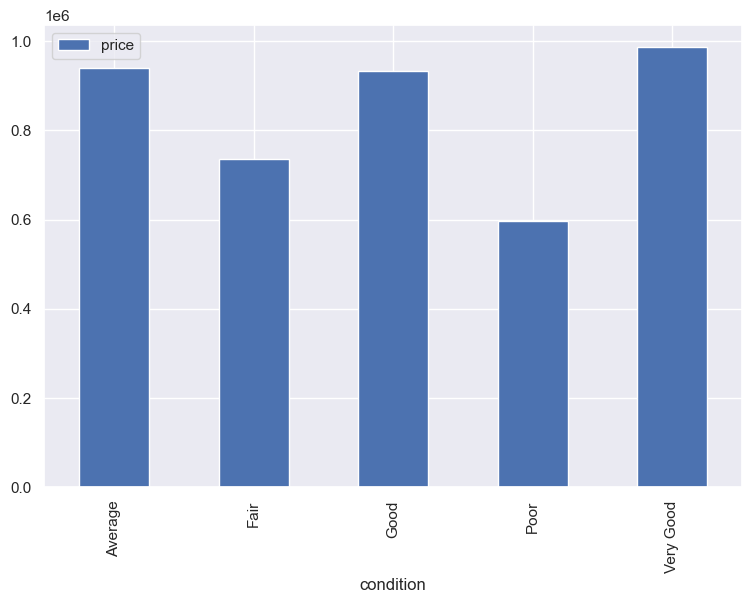

In [40]:
# Plotting condition against price to see how condition impacts price

kc.groupby('condition').mean().plot.bar(y="price", figsize=(9,6))

Based on this graph, it appears to be that the data is presenting as expected. Homes that are considered *average*, *good* or *very good* have a higher sale price than those that are in *fair* or *poor* condition. However, *very good* still doesn't appear to have a much higher sell price than *average*.

In [41]:
# Checking how many homes are near a greenbelt 

kc['greenbelt'].value_counts()

NO     27453
YES      668
Name: greenbelt, dtype: int64

<AxesSubplot:xlabel='greenbelt'>

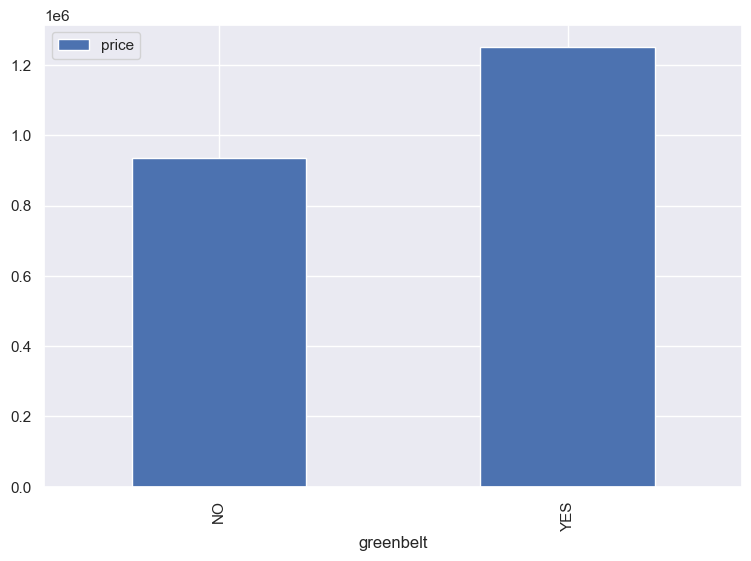

In [42]:
# Checking to see how being near a greenbelt could impact price

kc.groupby('greenbelt').mean().plot.bar(y="price", figsize=(9,6))

A greenbelt is an area in a city where building is restricted. It might be a park or land under conservation. There aren't many homes that are near a greenbelt, so this also won't do a great job at explaining our data, but it does appear that homes which are near a greenbelt sell for at least $200,000 more.

In [43]:
# Checking to see how many houses are nearby a nuisance

kc['nuisance'].value_counts()

NO     23251
YES     4870
Name: nuisance, dtype: int64

<AxesSubplot:xlabel='nuisance'>

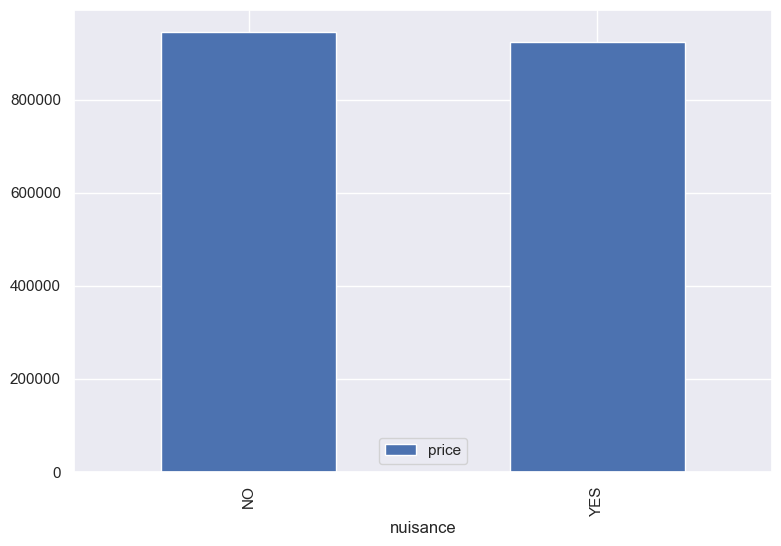

In [44]:
# Seeing if being near a nuisance impacts price

kc.groupby('nuisance').mean().plot.bar(y="price", figsize=(9,6))

In the definitions, a nuisance is explained as whether or not a home has a lot of traffic noise or other nuisances that can impact someone's tranquility in their home. This would be something that you would think decreases a home's value, but based on the graph above, it doesn't appear to do so. That might be because homes which have noises from traffic also might be closer to highways or in busier, more expensive areas.

In [45]:
# Checking to see how views are distributed in the DataFrame

kc['view'].value_counts()

NONE         25325
AVERAGE       1665
GOOD           680
EXCELLENT      276
FAIR           175
Name: view, dtype: int64

Apparently, most homes don't have a view, so it's unlikely that this will be included in the model.

In [46]:
# Now I'll be checking the value counts for grade, which will probably have a bigger impact than view or nuisance

kc['grade'].value_counts()

7 Average        11613
8 Good            9164
9 Better          3224
6 Low Average     2822
10 Very Good       748
5 Fair             380
11 Excellent       104
4 Low               45
12 Luxury           10
3 Poor               9
13 Mansion           1
2 Substandard        1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

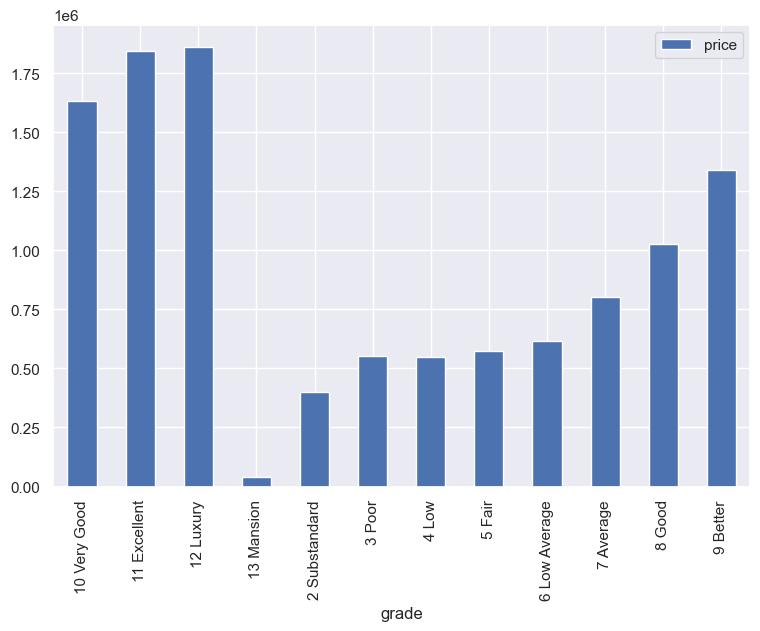

In [47]:
# Checking grade against price to see if it will be meaningful

kc.groupby('grade').mean().plot.bar(y="price", figsize=(9,6))

Grade could be a good predictor for the regression model as well because it has varying prices and the homes in the DataFrame are spread out in terms of grade.

In [48]:
kc['sewer_system'].value_counts()

PUBLIC                24028
PRIVATE                4085
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

More exploratory analysis will need to be done to determine if private vs public sewer system makes a big difference, but a sewer system isn't something that could be easily remodeled for a homeowner or real estate investment firm, so I'm not going to use that in my regression model.

The last categorical feature in the DataFrame is address, and although areas and neighborhoods can greatly increase or decrease a house's selling price, for the sake of time I won't be looking that in my model. 

In [49]:
# Deleting some columns that I know I won't be using in my model

kc.drop(['waterfront', 'view', 'date', 'sewer_system', 'address'], axis=1, inplace=True)

In [50]:
# Seeing what the DataFrame looks like now with some of the columns removed

kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,condition,grade,heat_source,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,Good,7 Average,Gas,0,0,40,1969,0,47.461975,-122.19052
8910500230,920000.0,5,2.5,2770,6703,1.0,NO,YES,Average,7 Average,Oil,1570,0,240,1950,0,47.711525,-122.35591
1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,Average,7 Average,Gas,1580,0,0,1956,0,47.502045,-122.22520
1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,Average,9 Better,Gas,1070,200,270,2010,0,47.566110,-122.29020
8562780790,592500.0,2,2.0,1120,758,2.0,NO,YES,Average,7 Average,Electricity,550,550,30,2012,0,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,Good,8 Good,Oil,1130,0,210,1921,0,47.664740,-122.32940
194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,Average,7 Average,Gas,0,0,520,2011,0,47.565610,-122.38851
7960100080,800000.0,3,2.0,1620,3600,1.0,NO,YES,Average,7 Average,Gas,920,240,110,1995,0,47.610395,-122.29585


I'm also going to drop `yr_renovated` from the DataFrame because the data in that column isn't reliable with values of 0, and I'm also going to drop `yr_built` because it has such a low correlation to price.

In [51]:
kc.drop(['yr_renovated', 'yr_built'], axis=1, inplace=True)

In [52]:
# Dropping any duplicates in the DataFrame

kc.drop_duplicates(inplace=True)

In [53]:
# Checking the new size of the DataFrame

kc.shape

(28100, 16)

In [54]:
# Getting some statistics for the DataFrame so I know averages, standard deviations, and quantiles

kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,lat,long
count,2.810000e+04,28100.000000,28100.000000,28100.000000,2.810000e+04,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000
mean,9.422538e+05,3.360391,2.248665,1989.406157,1.554466e+04,1.523078,451.366014,314.852242,202.359644,47.316256,-121.305677
std,4.348333e+05,0.952693,0.797088,798.998213,5.345611e+04,0.566804,542.110602,272.258868,226.887505,1.452590,5.767495
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,21.274240,-157.791480
25%,6.300000e+05,3.000000,2.000000,1390.000000,4.742500e+03,1.000000,0.000000,0.000000,40.000000,47.390284,-122.329263
50%,8.300000e+05,3.000000,2.500000,1860.000000,7.320000e+03,1.500000,0.000000,380.000000,140.000000,47.541827,-122.233833
75%,1.200000e+06,4.000000,2.500000,2468.500000,1.013200e+04,2.000000,910.000000,500.000000,300.000000,47.670558,-122.116386
max,2.276500e+06,11.000000,7.500000,8020.000000,3.067495e+06,4.000000,3560.000000,3580.000000,4370.000000,64.824070,-70.074340


Taking a look at some of the means of these columns, the homes from King's County in this DataFrame have 3 bedrooms
and 2 bathrooms on average. Technically there are more, which is impossible for bedrooms, but homes do have "half
baths." Also, the maximum has 13 bedroms and 10.5 bathrooms! 

### Building a Baseline Simple Linear Regression Model

Building a baseline is important because it is what I will compare the model reiterations to. The goal will be to get a better R-squared, so I know that the models are getting more and more accurate, as well as the MAE. 

In [55]:
# Finding the most correlated column to price

kc.corr()["price"]

price            1.000000
bedrooms         0.316236
bathrooms        0.433989
sqft_living      0.564681
sqft_lot         0.077282
floors           0.196195
sqft_basement    0.205515
sqft_garage      0.238113
sqft_patio       0.245839
lat              0.085773
long            -0.030108
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

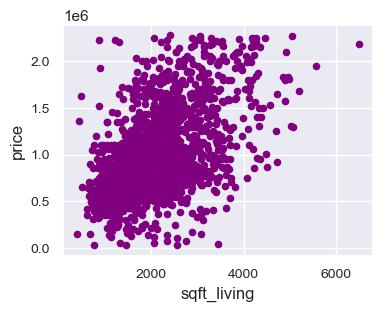

In [56]:
# Plotting a sample to show the most correlated vs. price

kc.sample(2000, random_state=1).plot.scatter(x='sqft_living', y="price", figsize=(4,3), fontsize=10, color='purple')
## create fitted line sns.regplot

In [57]:
# Creating variables to perform regression analysis

y = kc["price"]
X_baseline = kc[['sqft_living']]

In [58]:
# Creating a simple linear regression

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [59]:
# Printing results of the model to evaluate model performance

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.315e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:24:03   Log-Likelihood:            -3.9929e+05
No. Observations:               28100   AIC:                         7.986e+05
Df Residuals:                   28098   BIC:                         7.986e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.309e+05   5744.487     57.600      

Since *R-squared* is 0.319, I know that this model based solely on `sqft_living` impacting price is not doing a great job of explaining changes in price, but it's still great to have lots of room for improvement.

In [60]:
# Checking Mean Absolute Error for the first model to set a baseline

baseline_results.resid.abs()

id
7399300360     18513.171052
8910500230    262140.079372
1180000275    904944.456677
1604601802    219679.441589
8562780790     82574.419795
                  ...      
7834800180    637148.688650
194000695     361344.311345
7960100080     28730.680273
2781280080    345677.575181
9557800100    199659.421471
Length: 28100, dtype: float64

In [61]:
baseline_mae = baseline_results.resid.abs().sum() / len(y)
baseline_mae

279829.4091958065

With a MAE of $279,829.41, this means that on average, the model could be off by that amount in either direction. Ideally, I would like the model to be more accurate.

## Dealing with Categorical Variables

In [62]:
# First categorical variable I'm going to look at is grade
# Getting values counts of grade to see how data is distributed and a complete list of potential grades

kc['grade'].value_counts()

7 Average        11608
8 Good            9149
9 Better          3223
6 Low Average     2822
10 Very Good       748
5 Fair             380
11 Excellent       104
4 Low               45
12 Luxury           10
3 Poor               9
13 Mansion           1
2 Substandard        1
Name: grade, dtype: int64

In [63]:
# Creating a copy of the grade column so I know which one I've made changes to and I have a backup

kc['grade_2'] = kc['grade'].copy()

In [64]:
# Using the categorical method to rank the grade column properly

pd.Categorical(kc['grade_2'], categories=['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', 
                                          '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', 
                                          '13 Mansion'], ordered=True)

['7 Average', '7 Average', '7 Average', '9 Better', '7 Average', ..., '8 Good', '7 Average', '7 Average', '8 Good', '7 Average']
Length: 28100
Categories (12, object): ['2 Substandard' < '3 Poor' < '4 Low' < '5 Fair' ... '10 Very Good' < '11 Excellent' < '12 Luxury' < '13 Mansion']

In [65]:
# Using pd.get_dummies to One-Hot Encode the new grade column and dropping the first column to avoid the dummy trap

kc = pd.get_dummies(kc, columns=['grade_2'], drop_first=True)
kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,greenbelt,nuisance,condition,grade,...,grade_2_12 Luxury,grade_2_13 Mansion,grade_2_2 Substandard,grade_2_3 Poor,grade_2_4 Low,grade_2_5 Fair,grade_2_6 Low Average,grade_2_7 Average,grade_2_8 Good,grade_2_9 Better
id,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,Good,7 Average,...,0,0,0,0,0,0,0,1,0,0
8910500230,920000.0,5,2.5,2770,6703,1.0,NO,YES,Average,7 Average,...,0,0,0,0,0,0,0,1,0,0
1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,Average,7 Average,...,0,0,0,0,0,0,0,1,0,0
1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,Average,9 Better,...,0,0,0,0,0,0,0,0,0,1
8562780790,592500.0,2,2.0,1120,758,2.0,NO,YES,Average,7 Average,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,Good,8 Good,...,0,0,0,0,0,0,0,0,1,0
194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,Average,7 Average,...,0,0,0,0,0,0,0,1,0,0
7960100080,800000.0,3,2.0,1620,3600,1.0,NO,YES,Average,7 Average,...,0,0,0,0,0,0,0,1,0,0


In [66]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28100 entries, 7399300360 to 9557800100
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  28100 non-null  float64
 1   bedrooms               28100 non-null  int64  
 2   bathrooms              28100 non-null  float64
 3   sqft_living            28100 non-null  int64  
 4   sqft_lot               28100 non-null  int64  
 5   floors                 28100 non-null  float64
 6   greenbelt              28100 non-null  object 
 7   nuisance               28100 non-null  object 
 8   condition              28100 non-null  object 
 9   grade                  28100 non-null  object 
 10  heat_source            28100 non-null  object 
 11  sqft_basement          28100 non-null  int64  
 12  sqft_garage            28100 non-null  int64  
 13  sqft_patio             28100 non-null  int64  
 14  lat                    28100 non-null  f

### Creating a Second Regression Model

In [67]:
y=kc['price']
X_secondmodel = kc[['sqft_living', 'grade_2_12 Luxury', 'grade_2_11 Excellent', 'grade_2_9 Better',
                   'grade_2_13 Mansion', 'grade_2_2 Substandard', 'grade_2_3 Poor', 'grade_2_4 Low', 
                  'grade_2_5 Fair', 'grade_2_6 Low Average', 'grade_2_7 Average', 'grade_2_8 Good']]

In [68]:
secondmodel = sm.OLS(y, sm.add_constant(X_secondmodel))
second_results = secondmodel.fit()

In [69]:
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1446.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:24:03   Log-Likelihood:            -3.9793e+05
No. Observations:               28100   AIC:                         7.959e+05
Df Residuals:                   28087   BIC:                         7.960e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.531e+

Including grade improved my R-squared by a decent amount, but it's still not as high as I would like it to be. I'm going to compare my MAE and see if it's improved from the second model.

In [70]:
# Getting absolute value of residuals

second_results.resid.abs()

id
7399300360     21227.377540
8910500230     90063.626526
1180000275    720775.568280
1604601802    449704.492477
8562780790     91884.500220
                  ...      
7834800180    584727.237502
194000695     450972.339977
7960100080     16924.855445
2781280080    325544.413021
9557800100    200175.003314
Length: 28100, dtype: float64

In [71]:
# Getting the Mean Absolute Error (MAE) for the second model

second_mae = second_results.resid.abs().sum() / len(y)
second_mae

264456.4329585226

Great! Not only did my R-squared improve in the second model , but my MAE also went down.

### Creating a Third Regression Model

In [72]:
# First creating a copy of the condition column before I make changes to it

kc['condition_2'] = kc['condition'].copy()

In [73]:
# Getting value counts to see a complete list of values and see how the data is dispersed

kc['condition_2'].value_counts()

Average      17114
Good          7654
Very Good     3054
Fair           218
Poor            60
Name: condition_2, dtype: int64

In [74]:
# Using categorical method to rank condition

pd.Categorical(kc['condition_2'], categories=['Poor', 'Fair', 'Average', 'Good', ' Very Good'], ordered=True)

['Good', 'Average', 'Average', 'Average', 'Average', ..., 'Good', 'Average', 'Average', 'Average', 'Average']
Length: 28100
Categories (5, object): ['Poor' < 'Fair' < 'Average' < 'Good' < ' Very Good']

In [75]:
# Creating dummy variables for condition_2 which is now ranked

kc = pd.get_dummies(kc, columns=['condition_2'], drop_first=True)

In [76]:
# Running kc.info to get a complete list of the columns
# I'm expecting one of the condition_2 columns to be missing because I dropped one to avoid overfitting

kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28100 entries, 7399300360 to 9557800100
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  28100 non-null  float64
 1   bedrooms               28100 non-null  int64  
 2   bathrooms              28100 non-null  float64
 3   sqft_living            28100 non-null  int64  
 4   sqft_lot               28100 non-null  int64  
 5   floors                 28100 non-null  float64
 6   greenbelt              28100 non-null  object 
 7   nuisance               28100 non-null  object 
 8   condition              28100 non-null  object 
 9   grade                  28100 non-null  object 
 10  heat_source            28100 non-null  object 
 11  sqft_basement          28100 non-null  int64  
 12  sqft_garage            28100 non-null  int64  
 13  sqft_patio             28100 non-null  int64  
 14  lat                    28100 non-null  f

In [77]:
# Creating a new regression model and including the new condition columns

y = kc['price']
X_thirdmodel = kc[['sqft_living', 'grade_2_12 Luxury', 'grade_2_11 Excellent', 'grade_2_9 Better',
                   'grade_2_13 Mansion', 'grade_2_2 Substandard', 'grade_2_3 Poor', 'grade_2_4 Low', 
                  'grade_2_5 Fair', 'grade_2_6 Low Average', 'grade_2_7 Average', 'grade_2_8 Good', 
                  'condition_2_Fair', 'condition_2_Very Good', 'condition_2_Good', 'condition_2_Poor']]

In [78]:
thirdmodel = sm.OLS(y, sm.add_constant(X_thirdmodel))
third_results = thirdmodel.fit()

In [79]:
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1147.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:            -3.9762e+05
No. Observations:               28100   AIC:                         7.953e+05
Df Residuals:                   28083   BIC:                         7.954e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.596e+

Including condition didn't improve my R-squared as much as I had hoped, but it still improved. I'm going to pull in bathrooms and bedrooms into my model as well, along with some other numerical variables to see if that will help. Before I do that, I want to check on the distributions of bathrooms and bedrooms to see if there are any outliers that need to be removed.

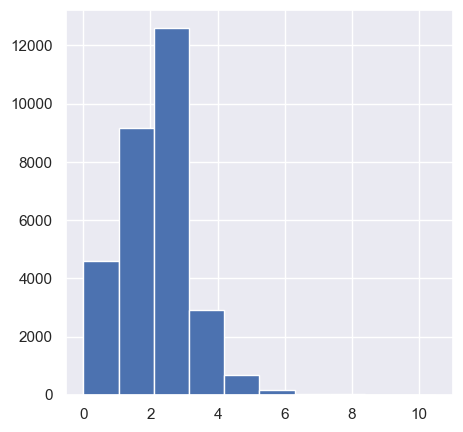

In [80]:
df['bathrooms'].hist(figsize=(5,5));

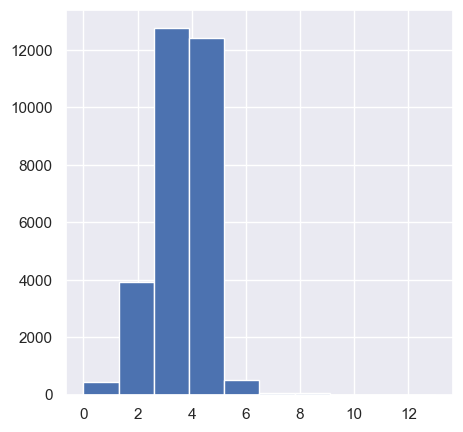

In [81]:
df['bedrooms'].hist(figsize=(5,5));